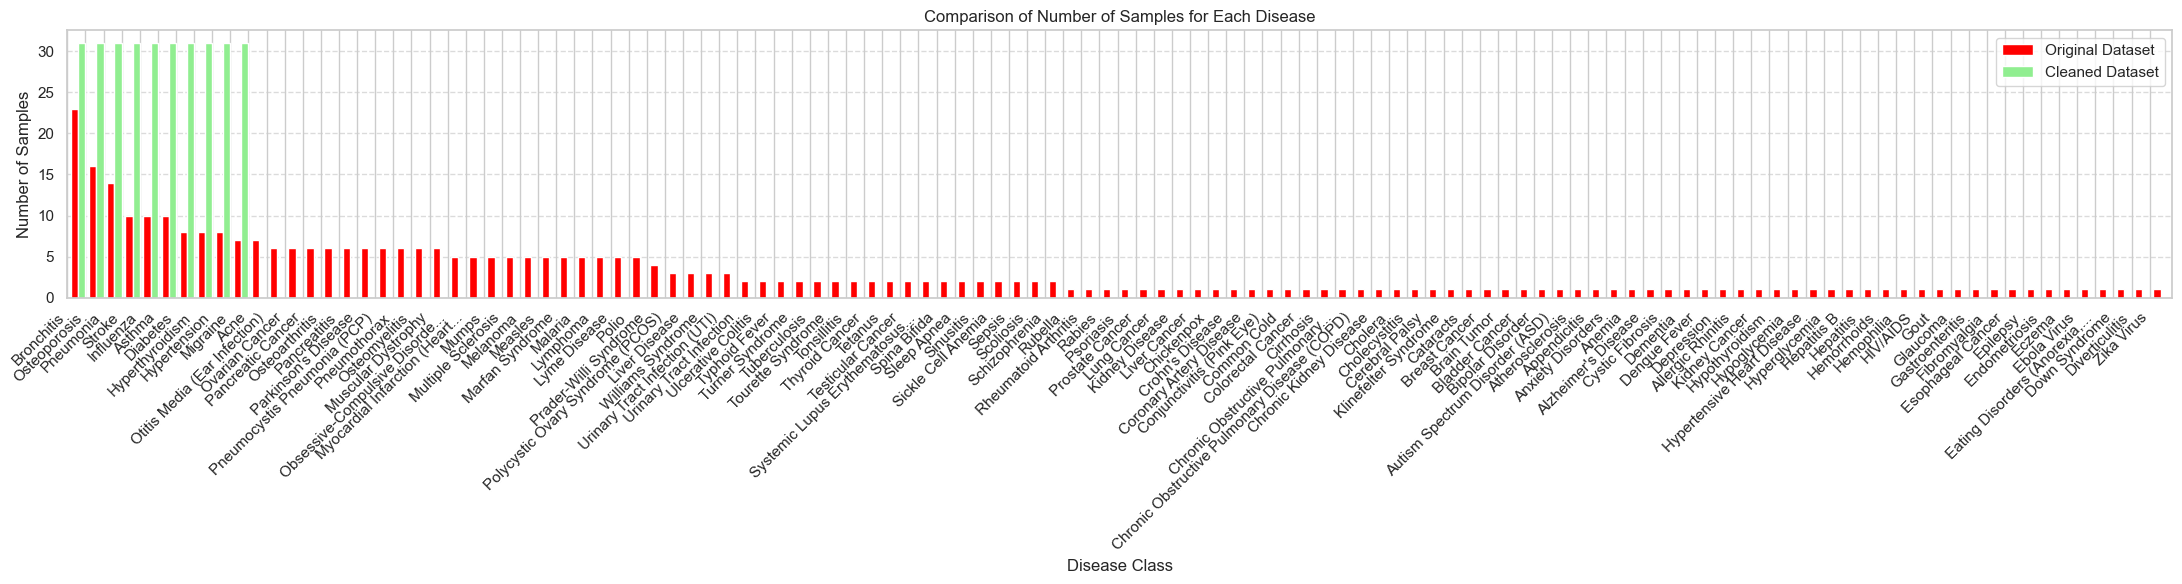

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Open locally stored datasets
df = pd.read_csv('kaggle/Disease Symptoms and Patient Profile Dataset_exported.csv')
df_cleaned = pd.read_csv('kaggle/Disease Symptoms and Patient Profile Dataset_balanced.csv')

# Display statistics of number of classes and number of samples for each class in graph
disease_occurrence_count = df['Disease'].value_counts()
disease_occurrence_count_cleaned = df_cleaned['Disease'].value_counts()

# Combine the two sets of classes to get all possible classes
all_disease_classes = disease_occurrence_count.index.union(disease_occurrence_count_cleaned.index)

# Reindex both datasets to ensure they include all the classes
disease_occurrence_count = disease_occurrence_count.reindex(all_disease_classes, fill_value=0).sort_values(ascending=False)
disease_occurrence_count_cleaned = disease_occurrence_count_cleaned.reindex(all_disease_classes, fill_value=0).sort_values(ascending=False)

# Plot the distribution of diseases
plt.figure(figsize=(22, 6))

# Plot dataset 1 (original dataset)
disease_occurrence_count.plot(kind='bar', color='red', width=0.4, position=-0.5, label='Original Dataset')

# Plot dataset 2 (cleaned dataset)
disease_occurrence_count_cleaned.plot(kind='bar', color='lightgreen', width=0.4, position=-1.5, label='Cleaned Dataset')

# Add labels and title
plt.title('Comparison of Number of Samples for Each Disease')
plt.xlabel('Disease Class')
plt.ylabel('Number of Samples')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Adjust layout to make sure everything fits (important for long labels)
plt.tight_layout()

# Display the plot
plt.show()

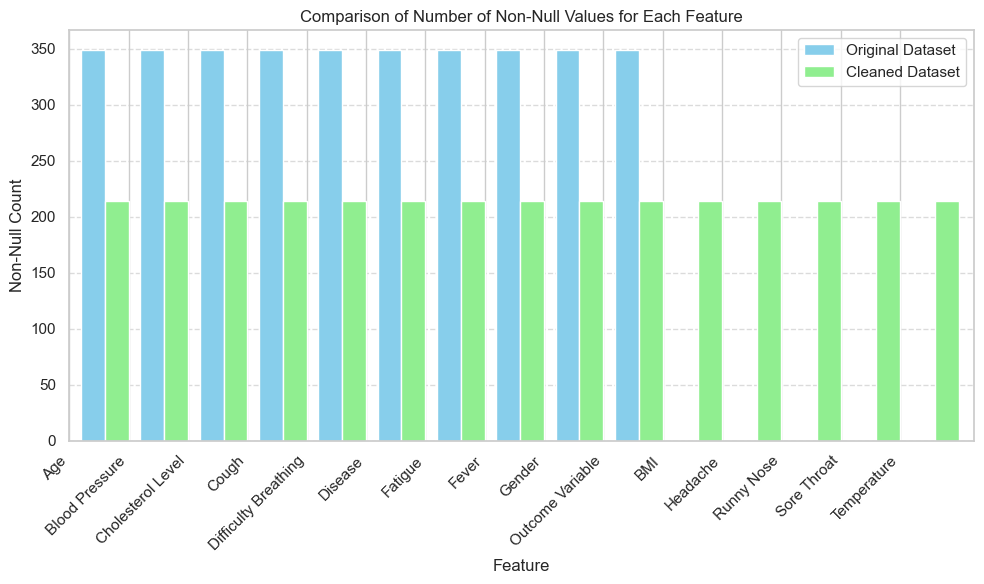

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Count non-null values for each feature in the original and cleaned datasets
df_non_null_count = df.notnull().sum()
df_cleaned_non_null_count = df_cleaned.notnull().sum()

# Create a DataFrame for plotting
feature_comparison = pd.DataFrame({
    'Original Dataset': df_non_null_count,
    'Cleaned Dataset': df_cleaned_non_null_count
})

# Sort by 'Original Dataset' values for better visualization
feature_comparison = feature_comparison.sort_values(by='Original Dataset', ascending=False)

# Plot feature comparison
plt.figure(figsize=(10, 6))

# Plot the original dataset
feature_comparison['Original Dataset'].plot(kind='bar', color='skyblue', width=0.4, position=-0.5, label='Original Dataset')

# Plot the cleaned dataset
feature_comparison['Cleaned Dataset'].plot(kind='bar', color='lightgreen', width=0.4, position=-1.5, label='Cleaned Dataset')

# Add labels and title
plt.title('Comparison of Number of Non-Null Values for Each Feature')
plt.xlabel('Feature')
plt.ylabel('Non-Null Count')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Adjust layout to make sure everything fits (important for long labels)
plt.tight_layout()

# Display the plot
plt.show()

In [4]:
"""
Data Cleaning


"""

import pandas as pd

# Open locally stored dataset
df = pd.read_csv('kaggle/Disease Symptoms and Patient Profile Dataset_exported.csv')

# Display statistics of number of classes and number of samples for each class
disease_occurrence_count = df['Disease'].value_counts()

# return first n names of diseases
n = 10
disease_names = disease_occurrence_count.index[:n].tolist()
print(disease_names)

# Filter the dataset to only include the first n diseases
df_filtered = df[df['Disease'].isin(disease_names)].copy()

# New symptoms
new_symptoms = ['Headache', 'Sore Throat','Runny Nose']
new_vital_signs = ['Temperature', 'BMI'] 

# Add new symptoms to the dataset using .loc
for symptom in new_symptoms:
    df_filtered.loc[:, symptom] = 'No'

# Add new vital signs with default values
df_filtered.loc[:, 'Temperature'] = 36.5  # Normal temperature
df_filtered.loc[:, 'BMI'] = 22.5  # Normal BMI

# Update existing records with 'Yes' where applicable for positive cases
# Influenza
df_filtered.loc[
    (df_filtered['Disease'] == 'Influenza') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    ['Headache', 'Sore Throat', 'Runny Nose', 'Temperature']
] = ['Yes', 'Yes', 'Yes', 38.0]  # Higher temperature for fever

# Migraine
df_filtered.loc[
    (df_filtered['Disease'] == 'Migraine') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    'Headache'
] = 'Yes'

# Stroke
df_filtered.loc[
    (df_filtered['Disease'] == 'Stroke') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    'Headache'
] = 'Yes'

# Hypertension
df_filtered.loc[
    (df_filtered['Disease'] == 'Hypertension') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    'Headache'
] = 'Yes'

# Pneumonia
df_filtered.loc[
    (df_filtered['Disease'] == 'Pneumonia') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    ['Sore Throat', 'Temperature']
] = ['Yes', 39.0]  # Fever for Pneumonia

# Bronchitis
df_filtered.loc[
    (df_filtered['Disease'] == 'Bronchitis') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    ['Sore Throat', 'Runny Nose', 'Temperature']
] = ['Yes', 'Yes', 37.8]  # Elevated temperature

# Add new records (example)
new_records = pd.DataFrame([
    {'Disease': 'Asthma', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'BMI': 24.0},
    {'Disease': 'Diabetes', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'BMI': 28.0},
    # Add more records as needed
])

# Append new records to the DataFrame
df_updated = pd.concat([df_filtered, new_records], ignore_index=True)

# Store in new CSV file
df_filtered.to_csv('kaggle/Disease Symptoms and Patient Profile Dataset_filtered.csv', index=False)


['Asthma', 'Stroke', 'Osteoporosis', 'Hypertension', 'Diabetes', 'Migraine', 'Influenza', 'Pneumonia', 'Bronchitis', 'Hyperthyroidism']


In [ ]:
import pandas as pd

# Open locally stored dataset
df = pd.read_csv('kaggle/Disease Symptoms and Patient Profile Dataset_exported.csv')

